In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Análise Aluguéis

In [80]:
data = pd.read_csv(".\\introducao-a-data-science-aula0\\aula0\\ml-latest-small\\aluguel.csv", delimiter=';')
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [13]:
data.describe().round(2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.00,32960.00,32960.00,32960.00,3.294300e+04,28867.00,22723.00
mean,1.77,1.75,0.67,231.90,1.295266e+04,2388.06,2364.41
std,1.72,20.38,1.18,1135.25,6.675220e+05,39184.96,179564.06
min,0.00,0.00,0.00,0.00,7.500000e+01,1.00,1.00
25%,0.00,0.00,0.00,55.00,1.500000e+03,590.00,110.00
50%,2.00,1.00,0.00,87.00,2.800000e+03,990.00,250.00
75%,3.00,2.00,1.00,170.00,6.500000e+03,1800.00,697.00
max,100.00,1966.00,70.00,90000.00,1.200000e+08,6552570.00,27053070.00


In [15]:
data.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

# 2. Análise Dados Extra


In [25]:
json = open(".\\introducao-a-data-science-aula0\\aula0\\ml-latest-small\\extras\\dados\\aluguel.json")
df_json = pd.read_json(json)
df_json

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


# 3. Series e Index

In [45]:
tipo_imovel = pd.DataFrame(data.Tipo.drop_duplicates())
tipo_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


# 4. Filtrando Dados

## 4.1. Imóveis residenciais

In [75]:
data = data.fillna(0)
tipo_imovel = list(data['Tipo'].drop_duplicates())

residencial = ['Quitinete', 
'Casa',
'Apartamento',
'Casa de Condomínio',
'Casa de Vila']

In [76]:
selecao = data['Tipo'].isin(residencial)
dados_residenciais = data[selecao]
dados_residenciais.index = range(dados_residenciais.shape[0])
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## 4.2. Imóveis Zona Sul

In [61]:
data.Bairro.unique()

bairros_zona_sul = ['Copacabana', 'Botafogo', 'Flamengo', 'Leblon', 'Ipanema']
filtro_zona_sul = data.Bairro.isin(bairros_zona_sul)
dados_bairro_zona_sul = data[filtro_zona_sul]
dados_bairro_zona_sul

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
14,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,NaN
15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
...,...,...,...,...,...,...,...,...,...
32938,Apartamento,Copacabana,1,0,0,50,1950.0,450.0,70.0
32945,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
32949,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0


## 4.3. Imóveis do tipo Apartamento

In [72]:
dados_apartamento = data[data.Tipo == 'Apartamento']
data_casa_casaCond_casaVila = data[data.Tipo.isin(['Casa', 'Casa de Condomínio', 'Casa de Vila'])]
data_60_100 = data[(data.Area >= 60) & (data.Area <= 100)]
data_2000 = data[(data.Quartos >= 4) & (data.Valor < 2000)]
data_2000

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
701,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1465,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2874,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
3075,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
3218,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0
3419,Casa de Vila,Méier,4,0,1,85,1600.0,NaN,NaN
4721,Pousada/Chalé,Barra da Tijuca,23,0,23,862,1480.0,295.0,NaN
5849,Casa,Campo Grande,4,1,0,140,1700.0,NaN,NaN
5852,Apartamento,Campo Grande,4,2,1,115,1900.0,500.0,NaN
6456,Apartamento,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0


# 5. Criando novas Variaveis

In [88]:
data['Valor_Bruto'] = round(data.Valor + data.Condominio + data.IPTU, 2)
data['Valor_m2'] = round(data.Valor/data.Area, 2)
data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto,Valor_m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,NaN,16.67
...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,NaN,42.86


In [89]:
data.pop('Valor_m2')
data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,NaN


# 6. Estatísticas Descritivas

<Axes: xlabel='Bairro'>

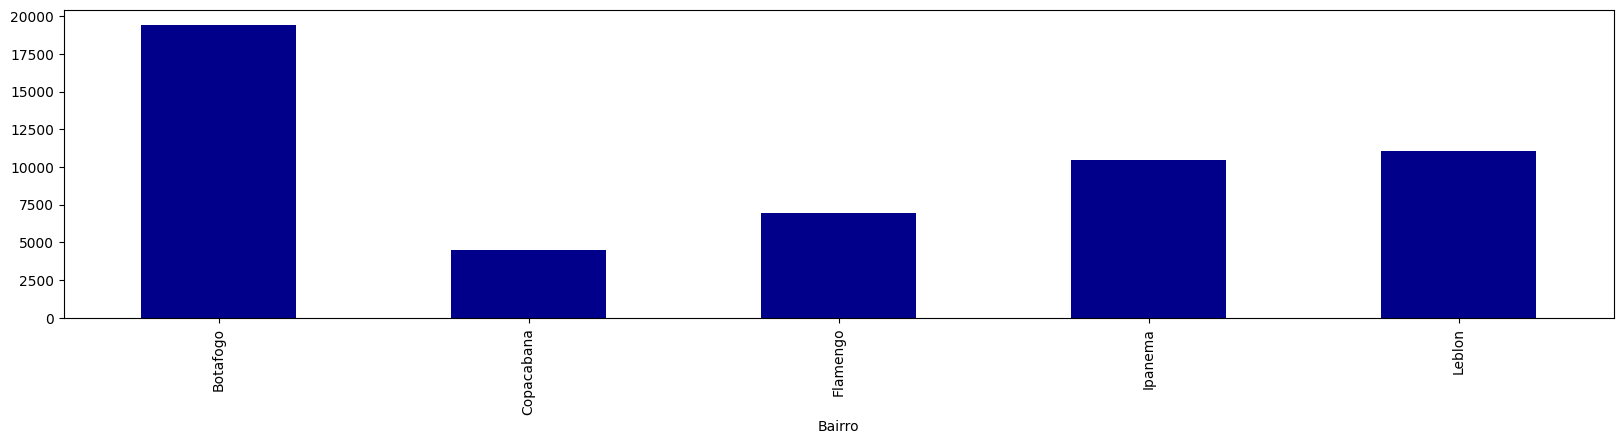

In [116]:
data_bairros_zona_sul = data[data.Bairro.isin(bairros_zona_sul)].fillna(0)
data_bairro_zona_sul_grouped = data_bairros_zona_sul.groupby('Bairro').Valor.describe().round(2)
plt.figure(figsize=(20,4))
data_bairro_zona_sul_grouped['mean'].plot.bar(color='darkblue')


# 7. Removendo Outliers 

<Axes: xlabel='Valor'>

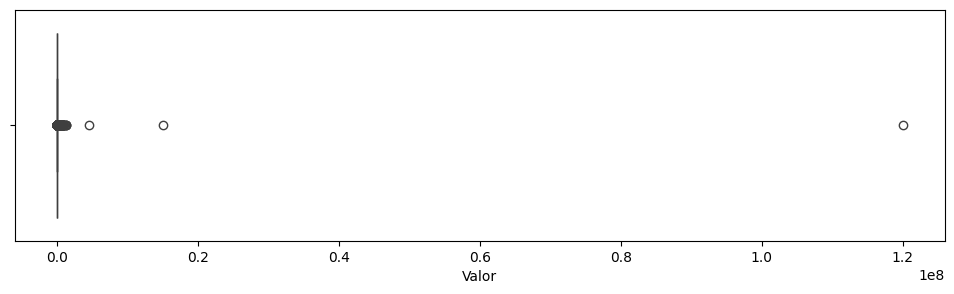

In [123]:
plt.figure(figsize=(12, 3))
sns.boxplot(data.Valor, orient='h')

<Axes: xlabel='Valor'>

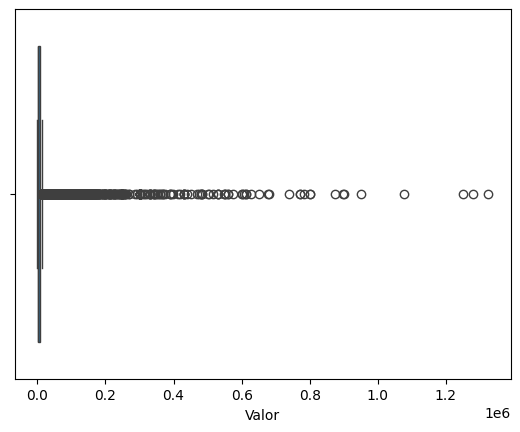

In [127]:
data = data[data.Valor < 100000000]
data = data[data.Valor < 4000000]
sns.boxplot(data.Valor, orient='h')